In [1]:
import tensorflow as tf
import numpy as numpy
from tensorflow import keras

In [3]:
fmnist = keras.datasets.fashion_mnist

# loading data

In [4]:
(x_train,y_train) , (x_test,y_test) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Visualising the image

LABEL: 1

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0 105 170 170 170 158 146 143  86   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11 185 181 193 206 178 181 186 188   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33 195 153 160 173 160 160 155 196  45   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  81 188 158 181 196 178 180 160 188  85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 116 183 168 180 213 186 176 180 190 105   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 120 171 155 165 191 173 165 165 193 110   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106 181 155 156 243 238 156 156 181 110   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  76 193 146 176 141 163 198 155 195  83   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  46 201 145 

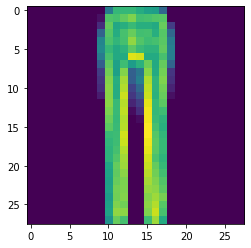

In [7]:
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 69

# Set number of characters per row when printing
numpy.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

# Visualize the image
plt.imshow(x_train[index])

# normalising the data

In [9]:
x_train = x_train/255
x_test = x_test/255

In [27]:
# building the model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(512 , activation = tf.nn.relu),
                                    tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)])

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['Accuracy'])

In [29]:
model.fit(x_train, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7028 - Accuracy: 0.7348
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4597 - Accuracy: 0.8321
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4088 - Accuracy: 0.8493
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3745 - Accuracy: 0.8624
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3530 - Accuracy: 0.8688


In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3966 - Accuracy: 0.8526


[0.3966216742992401, 0.8525999784469604]

In [31]:
results= model.predict(x_test)

In [32]:
print(results)

[[1.6617626e-06 6.5444533e-06 5.9788924e-08 ... 1.4359363e-02 1.4224665e-05 9.8121464e-01]
 [2.2844535e-04 7.2684401e-07 9.8678422e-01 ... 1.0582647e-12 1.1442683e-06 6.0469407e-12]
 [7.8632894e-08 9.9999905e-01 7.5513968e-09 ... 2.4010713e-14 2.1480560e-08 2.8111716e-14]
 ...
 [5.0345818e-03 4.7348522e-06 2.3213228e-04 ... 1.6331354e-05 9.8825628e-01 1.4199145e-07]
 [5.4504692e-08 9.9998891e-01 1.9082945e-08 ... 1.0094318e-09 6.1244970e-07 3.4089773e-11]
 [1.6270787e-04 3.2206870e-05 1.9542307e-04 ... 1.3661113e-02 4.0411472e-04 1.4467792e-03]]


In [33]:
results[0]

array([1.6617626e-06, 6.5444533e-06, 5.9788924e-08, 8.1682686e-07, 9.3887706e-07, 4.3966286e-03, 5.1122279e-06, 1.4359363e-02, 1.4224665e-05, 9.8121464e-01], dtype=float32)

In [34]:
y_test[0]

9